# Script to calculate the perceived brightness of the stimuli

Ways to do this are described here:
* https://stackoverflow.com/questions/3490727/what-are-some-methods-to-analyze-image-brightness-using-python

In [1]:
# import required libraries
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image # if needed: pip install Pillow

In [17]:
# initialize our variables and files we want to loop through:
data_path = './Luminance-Stimuli/'

stimuli = [
    'HI_adhel_bol',
    'HI_chiaraferragni',
    'HI_emilycanham',
    'HI_flaviapavanelli',
    'HI_imjennim',
    'HI_jenndeugikim',
    'HI_jihye',
    'HI_lamise',
    'HI_rosesarerosie',
    'HI_simoneses',
    'HI_sooyaaa__',
    'VI_bermudaisbae',
    'VI_iamxalara',
    'VI_immagram',
    'VI_leyalovenature',
    'VI_lilmiquela',
    'VI_magazineluiza',
    'VI_noonouri',
    'VI_rozygram',
    'VI_shudu.gram',
    'VI_soymar.ia'
]

df = []
cols = ['condition', 'luminance']

In [18]:
# function that provides the % of brightness in an image from 0 = black to 1 = white
# this makes use of the luminance attribut in images

def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale


In [19]:
# now let's loop through the provided data and store it in a data frame
if __name__ == '__main__':
    for i in stimuli:
        image = Image.open(str(data_path + i + ".png"))
#        print("%s\t%s" % (i, calculate_brightness(image)))
        df.append([i, calculate_brightness(image)])

table = pd.DataFrame(df, columns=cols)  
table.head()   

,condition,luminance
0,HI_adhel_bol,0.725058
1,HI_chiaraferragni,0.572219
2,HI_emilycanham,0.764226
3,HI_flaviapavanelli,0.827238
4,HI_imjennim,0.693795


In [21]:
# sweet, let's add a new column now that codes the microconditions into our 
# macroconditions HI and VI
table['macrocondition'] = table['condition']

table.loc[table['macrocondition'].str.contains(r'HI', na=True), 'macrocondition'] = "HI"
table.loc[table['macrocondition'].str.contains(r'VI', na=True), 'macrocondition'] = "VI"

table

,condition,luminance,macrocondition
0,HI_adhel_bol,0.725058,HI
1,HI_chiaraferragni,0.572219,HI
2,HI_emilycanham,0.764226,HI
3,HI_flaviapavanelli,0.827238,HI
4,HI_imjennim,0.693795,HI
5,HI_jenndeugikim,0.704419,HI
6,HI_jihye,0.823341,HI
7,HI_lamise,0.735845,HI
8,HI_rosesarerosie,0.641935,HI
9,HI_simoneses,0.698465,HI


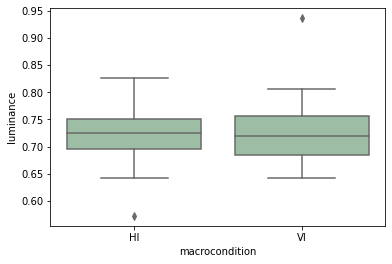

In [22]:
# Let's quickly plot the data to see if the are obvious outliers
import seaborn as sns
ax = sns.boxplot(x='macrocondition', y='luminance', data=table, color='#99c2a2')
plt.show()

# including a look at the data above, it appears that "HI_chiaraferragni" and "VI_noonouri" are two outliers

In [25]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('luminance ~ C(macrocondition)', data=table).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(macrocondition),0.001430,1.0,0.227614,0.638741
Residual,0.119394,19.0,NaN,NaN


## Sweet - we see there seem to be 2 outliers in the data, though per ANOVA results it is not significant... 

then again may be due to only 20 values being observed here...